# Week11 - Clustering Lab

* Create clusters for the following dataset
* Choose a meaningful cluster count
* Identify potential labels for each cluster

In [1]:
from zipfile import ZipFile
from io import BytesIO
import urllib.request as urllib2
import pandas as pd

def get_data():
    r = urllib2.urlopen("https://github.com/msaricaumbc/DS_data/blob/master/ds602/people_wiki.zip?raw=true").read()
    file = ZipFile(BytesIO(r))
    people_wiki_csv = file.open("people_wiki.csv")
    people = pd.read_csv(people_wiki_csv)
    people.drop('URI', inplace=True, axis=1)
    return people

people = get_data()
people.head()

,name,text
0,Digby Morrell,digby morrell born 10 october 1979 is a former...
1,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...
2,Harpdog Brown,harpdog brown is a singer and harmonica player...
3,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...
4,G-Enka,henry krvits born 30 december 1974 in tallinn ...


In [2]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(stop_words='english', max_features=10000)
corpus = vec.fit_transform(people.text)
corpus = corpus.toarray()
people_df = pd.DataFrame(corpus, columns=vec.get_feature_names_out())

In [3]:
corpus

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [4]:
vec

CountVectorizer(max_features=10000, stop_words='english')

In [5]:
people_df.head()

,01,10,100,1000,10000,100000,100m,100th,101,102,...,zhang,zhou,zimbabwe,zimbabwean,zombie,zone,zoo,zoology,zrich,zurich
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


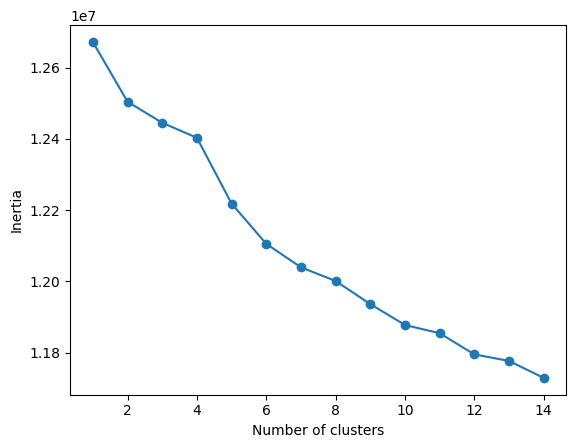

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

distortions = list()

for i in range(1, 15):
    km = KMeans(n_clusters=i, random_state=0, n_init='auto')
    km = km.fit(corpus)
    distortions.append(km.inertia_)
    
plt.plot(range(1,15), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

According to this elbow plot, the right number of clusters to pick appears to be 12.

In [8]:
km_model = KMeans(n_clusters=12, random_state=0, n_init='auto')

km_model.fit(corpus)

people['cluster'] = km_model.predict(corpus)
people

,name,text,cluster
0,Digby Morrell,digby morrell born 10 october 1979 is a former...,5
1,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...,0
2,Harpdog Brown,harpdog brown is a singer and harmonica player...,10
3,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...,0
4,G-Enka,henry krvits born 30 december 1974 in tallinn ...,2
...,...,...,...
42781,Motoaki Takenouchi,motoaki takenouchi born july 8 1967 saitama pr...,10
42782,"Alan Judge (footballer, born 1960)",alan graham judge born 14 may 1960 is a retire...,5
42783,Eduardo Lara,eduardo lara lozano born 4 september 1959 in c...,11
42784,Tatiana Faberg%C3%A9,tatiana faberg is an author and faberg scholar...,0


In [10]:
cluster_0 = people[people.cluster == 0]
cluster_0.head(10)

,name,text,cluster
1,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...,0
3,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...,0
10,Sophie Crumb,sophia violet sophie crumb born september 27 1...,0
11,Jenn Ashworth,jenn ashworth is an english writer she was bor...,0
13,"Anthony Gueterbock, 18th Baron Berkeley",anthony fitzhardinge gueterbock 18th baron ber...,0
24,Tom Jennings,tom jennings born 1955 as thomas daniel jennin...,0
26,Anthony Caruana,anthony caruana born 2 january 1968 is a melbo...,0
27,Ian Mitchell (author),ian mitchell is a scottish author who grew up ...,0
35,Freimut B%C3%B6rngen,freimut brngen born october 17 1930 is a germa...,0
37,Aharon Solomons,aharon solomons b september 27 1939 is a freed...,0


A potential label for cluster 0 could be producers (authors, filmmakers, etc.)

In [11]:
cluster_1 = people[people.cluster == 1]
cluster_1.head(10)

,name,text,cluster
40,Timothy Grucza,timothy grucza born 1 july 1976 melbourne aust...,1
85,Zvonimir Juri%C4%87,zvonimir juri born 4 june 1971 is a croatian f...,1
117,Christine Langan,christine langan born january 1965 is an engli...,1
170,Antonio Meneses Saillant,antonio meneses saillant born alfonso antonio ...,1
194,Usama Alshaibi,usama alshaibi arabic born in baghdad iraq on ...,1
219,Kat Coiro,katherine cunninghameves known as kat coiro is...,1
252,Stephen Evans (actor),stephen evans born 27 november 1970 is a briti...,1
331,Mammootty,mammootty born as muhammad kutty ismail panipa...,1
426,Neil Landau,neil landau is an american screenwriter playwr...,1
427,Martin Allen (writer),martin allen born in wakefieldyorkshire is an ...,1


It seems like cluster 1 is more concentrated towards filmmakers, so that is a potential label for cluster 1

In [12]:
cluster_2 = people[people.cluster == 2]
cluster_2.head(10)

,name,text,cluster
4,G-Enka,henry krvits born 30 december 1974 in tallinn ...,2
65,Susan Christie,susan christie is an american singersongwriter...,2
93,Martin Iveson,martin iveson is a british composer known for ...,2
112,Angus Clark,angus clark is a guitarist singer songwriter a...,2
160,Kevon Glickman,kevon glickman born november 5 1960 is an amer...,2
192,Bernie Hayes,bernie hayes is an australian singersongwriter...,2
221,Owen Temple,owen temple born september 4 1976 in kerrville...,2
244,Keyshia Cole,keyshia cole born october 15 1981 is an americ...,2
317,Carrie Underwood,carrie marie underwood born march 10 1983 is a...,2
322,MC Mell'O',mc mello comes from battersea in south london ...,2


These appear to be songwriters, singers, etc. so a potential label for cluster 2 would be music artist

Above are just some potential labels, but it is worth noting there should be more clusters, as the inertia listed for 12 clusters still was over 1 million, indicating that there is still a lot of variation in the data. However, going further would start getting really computationally expensive, so the number 12 was picked to start grouping the people into simple, albeit broad, categories.